**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [25]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata, fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance_matrix
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [133]:


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self._fit_X = X
        self._y = y
        self.classes = np.unique(y)
        return self

    def predict(self, X):
        _fit_X = self._fit_X
        _y = self._y
        distances = distance_matrix(X, _fit_X)
        args = np.argsort(distances)[:, :self.n_neighbors]
        print("sorted")
        k_neighbors = _y[args]
        print("k_neighbors")
        classes, count = np.unique(k_neighbors.astype(self.classes.dtype), return_counts=True, axis=1)
        print("uniq")
        return classes[:, np.argmax(count, axis=-1)]

    def predict_proba(self, X):
        _fit_X = self._fit_X
        _y = self._y
        n_samples = X.shape[0]
        n_classes = self.classes
        distances = distance_matrix(X, _fit_X)
        args = np.argsort(distances)[:, :self.n_neighbors]
        k_neighbors = _y[args]
        classes, count = np.unique(k_neighbors, return_counts=True, axis=1)
        res = np.zeros((n_samples, self.classes.shape[0]))
        for i in range(n_samples):
            for k, k_class in enumerate(n_classes):
                res[i, k] += np.sum(classes[i] == k_class)
            res[i] /= np.sum(count)

        return res

    def score(self, X, y):
        predicted = self.predict(X)
        return np.mean(predicted == y)


**IRIS**

In [134]:
iris = datasets.load_iris()

In [135]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [136]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [137]:
%time clf.fit(X_train, y_train)

CPU times: user 472 µs, sys: 434 µs, total: 906 µs
Wall time: 693 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [138]:
%time my_clf.fit(X_train, y_train)

CPU times: user 232 µs, sys: 213 µs, total: 445 µs
Wall time: 465 µs


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [139]:
%time clf.predict(X_test)

CPU times: user 1.48 ms, sys: 1.35 ms, total: 2.83 ms
Wall time: 1.86 ms


array([0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2])

In [140]:
%time my_clf.predict(X_test)

sorted
k_neighbors
uniq
CPU times: user 723 µs, sys: 662 µs, total: 1.39 ms
Wall time: 740 µs


array([0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2])

In [141]:
%time clf.predict_proba(X_test)

CPU times: user 930 µs, sys: 851 µs, total: 1.78 ms
Wall time: 1.99 ms


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [142]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.71 ms, sys: 0 ns, total: 1.71 ms
Wall time: 1.19 ms


array([[0.5, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0. , 0.5],
       [0.5, 0. , 0. ],
       [0.5, 0. , 0. ],
       [0.5, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0. , 0.5],
       [0. , 0. , 0.5],
       [0. , 0. , 0.5],
       [0.5, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0. , 0.5],
       [0. , 0.5, 0. ],
       [0. , 0. , 0.5]])

In [143]:
clf.score(X_test, y_test)

0.9333333333333333

In [120]:
my_clf.score(X_test, y_test)

sorted
k_neighbors
uniq


0.9333333333333333

Задание 3

sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq
sorted
k_neighbors
uniq


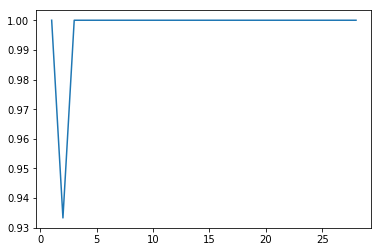

In [121]:


iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
max_neighbors = 29
min_neighbors = 1
scores = np.zeros((max_neighbors))

for i in range(min_neighbors, max_neighbors):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm='brute')
    my_clf.fit(X_train, y_train)
    scores[i] = my_clf.score(X_test, y_test)
    
plt.plot(np.arange(min_neighbors, max_neighbors), scores[min_neighbors:])
plt.show()

**MNIST**

In [122]:
mnist = fetch_openml('mnist_784')
#mnist = fetch_mldata('MNIST original')

In [123]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [124]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [125]:
%time clf.fit(X_train, y_train)

CPU times: user 98.4 ms, sys: 0 ns, total: 98.4 ms
Wall time: 98.1 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [126]:
%time my_clf.fit(X_train, y_train)

CPU times: user 26.7 ms, sys: 36 µs, total: 26.7 ms
Wall time: 26.5 ms


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [127]:
%time clf.predict(X_test)

CPU times: user 6.49 s, sys: 1.15 s, total: 7.64 s
Wall time: 1.42 s


array(['3', '0', '5', '0', '6', '3', '1', '2', '9', '0', '1', '5', '0',
       '9', '2', '7', '0', '6', '5', '9', '2', '0', '8', '2', '6', '2',
       '6', '6', '2', '4', '6', '7', '9', '9', '4', '3', '3', '2', '1',
       '5', '1', '3', '3', '7', '2', '9', '8', '4', '1', '5', '1', '2',
       '5', '3', '5', '3', '7', '9', '2', '8', '6', '6', '3', '6', '3',
       '0', '7', '8', '4', '2', '1', '3', '5', '9', '5', '5', '6', '6',
       '8', '7', '0', '2', '0', '9', '7', '5', '9', '9', '6', '6', '2',
       '3', '0', '7', '7', '3', '1', '6', '5', '5', '8', '3', '2', '9',
       '4', '3', '2', '8', '6', '5', '2', '4', '9', '0', '4', '7', '7',
       '8', '1', '8', '2', '5', '3', '6', '9', '5', '0', '8', '1', '5',
       '4', '4', '7', '7', '0', '6', '4', '7', '4', '2', '0', '3', '6',
       '3', '1', '4', '7', '7', '5', '6', '7', '2', '1', '9', '9', '2',
       '1', '5', '1', '6', '6', '7', '9', '8', '0', '3', '4', '8', '1',
       '3', '4', '5', '1', '7', '1', '8', '8', '7', '3', '7', '7

In [128]:
%time my_clf.predict(X_test)

sorted
k_neighbors


TypeError: The axis argument to unique is not supported for dtype object

In [129]:
%time clf.predict_proba(X_test)

CPU times: user 6.28 s, sys: 1.5 s, total: 7.78 s
Wall time: 1.52 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [130]:
%time my_clf.predict_proba(X_test)

KeyboardInterrupt: 

In [131]:
clf.score(X_test, y_test)

0.9528571428571428

In [132]:
my_clf.score(X_test, y_test)

KeyboardInterrupt: 

Задание 4

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [ ]:
%time clf.fit(X_train, y_train)

In [ ]:
%time my_clf.fit(X_train, y_train)

In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn
# matplotlib
# train_test_split
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# StandardScaler (from sklearn.preprocessing import StandardScaler)
# ClassifierMixin
# NeighborsBase
# KNeighborsMixin
# SupervisedIntegerMixin